# Baseball Case Study
Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

For downloading the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

# Import necessary Python Modules

In [245]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression,Lasso, Ridge, LassoCV, RidgeCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

# IMPORTING THE DATASET

In [246]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [247]:
#df['UER'] = df['RA'] - df['ER']
#df = pd.concat([df,df['UER']],axis=1)
#df.head()

# DATA EXPLORATION

In [248]:
df.shape

(30, 17)

In [249]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [250]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [251]:
for i in df.columns:
    print("*******************************************************")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('*******************************************************')

*******************************************************
Value counts of W 

68     3
83     2
74     2
76     2
81     2
64     1
93     1
92     1
90     1
88     1
87     1
86     1
85     1
84     1
80     1
97     1
100    1
78     1
63     1
79     1
71     1
67     1
98     1
95     1
Name: W, dtype: int64
*******************************************************
*******************************************************
Value counts of R 

696    2
689    2
640    1
644    1
720    1
573    1
764    1
891    1
697    1
694    1
626    1
751    1
622    1
748    1
683    1
613    1
737    1
669    1
667    1
729    1
661    1
724    1
656    1
655    1
650    1
713    1
647    1
703    1
Name: R, dtype: int64
*******************************************************
*******************************************************
Value counts of AB 

5485    2
5571    1
5605    1
5491    1
5565    1
5457    1
5428    1
5420    1
5567    1
5480    1
5439    1
5484    1
5417    1
5544    1
5527   

In [252]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [253]:
df.duplicated().sum()

0

In [254]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [255]:
df.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

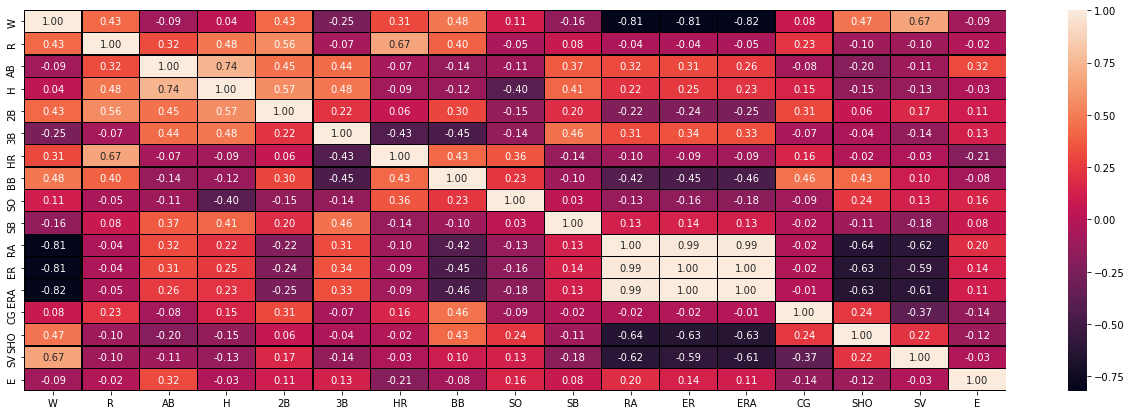

In [256]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidth=0.1,linecolor="black",fmt="0.2f")

In [257]:
corr_mat=np.abs(df.corr())
#corr_mat
corr_mat['W'].sort_values(ascending=False)

W      1.000000
ERA    0.819600
RA     0.812952
ER     0.809435
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
3B     0.251118
SB     0.157234
SO     0.111850
E      0.089485
AB     0.087947
CG     0.080533
H      0.037612
Name: W, dtype: float64

In [258]:
#RA & ER & ERA are highly correlated with W and also CORRELATED with each other.

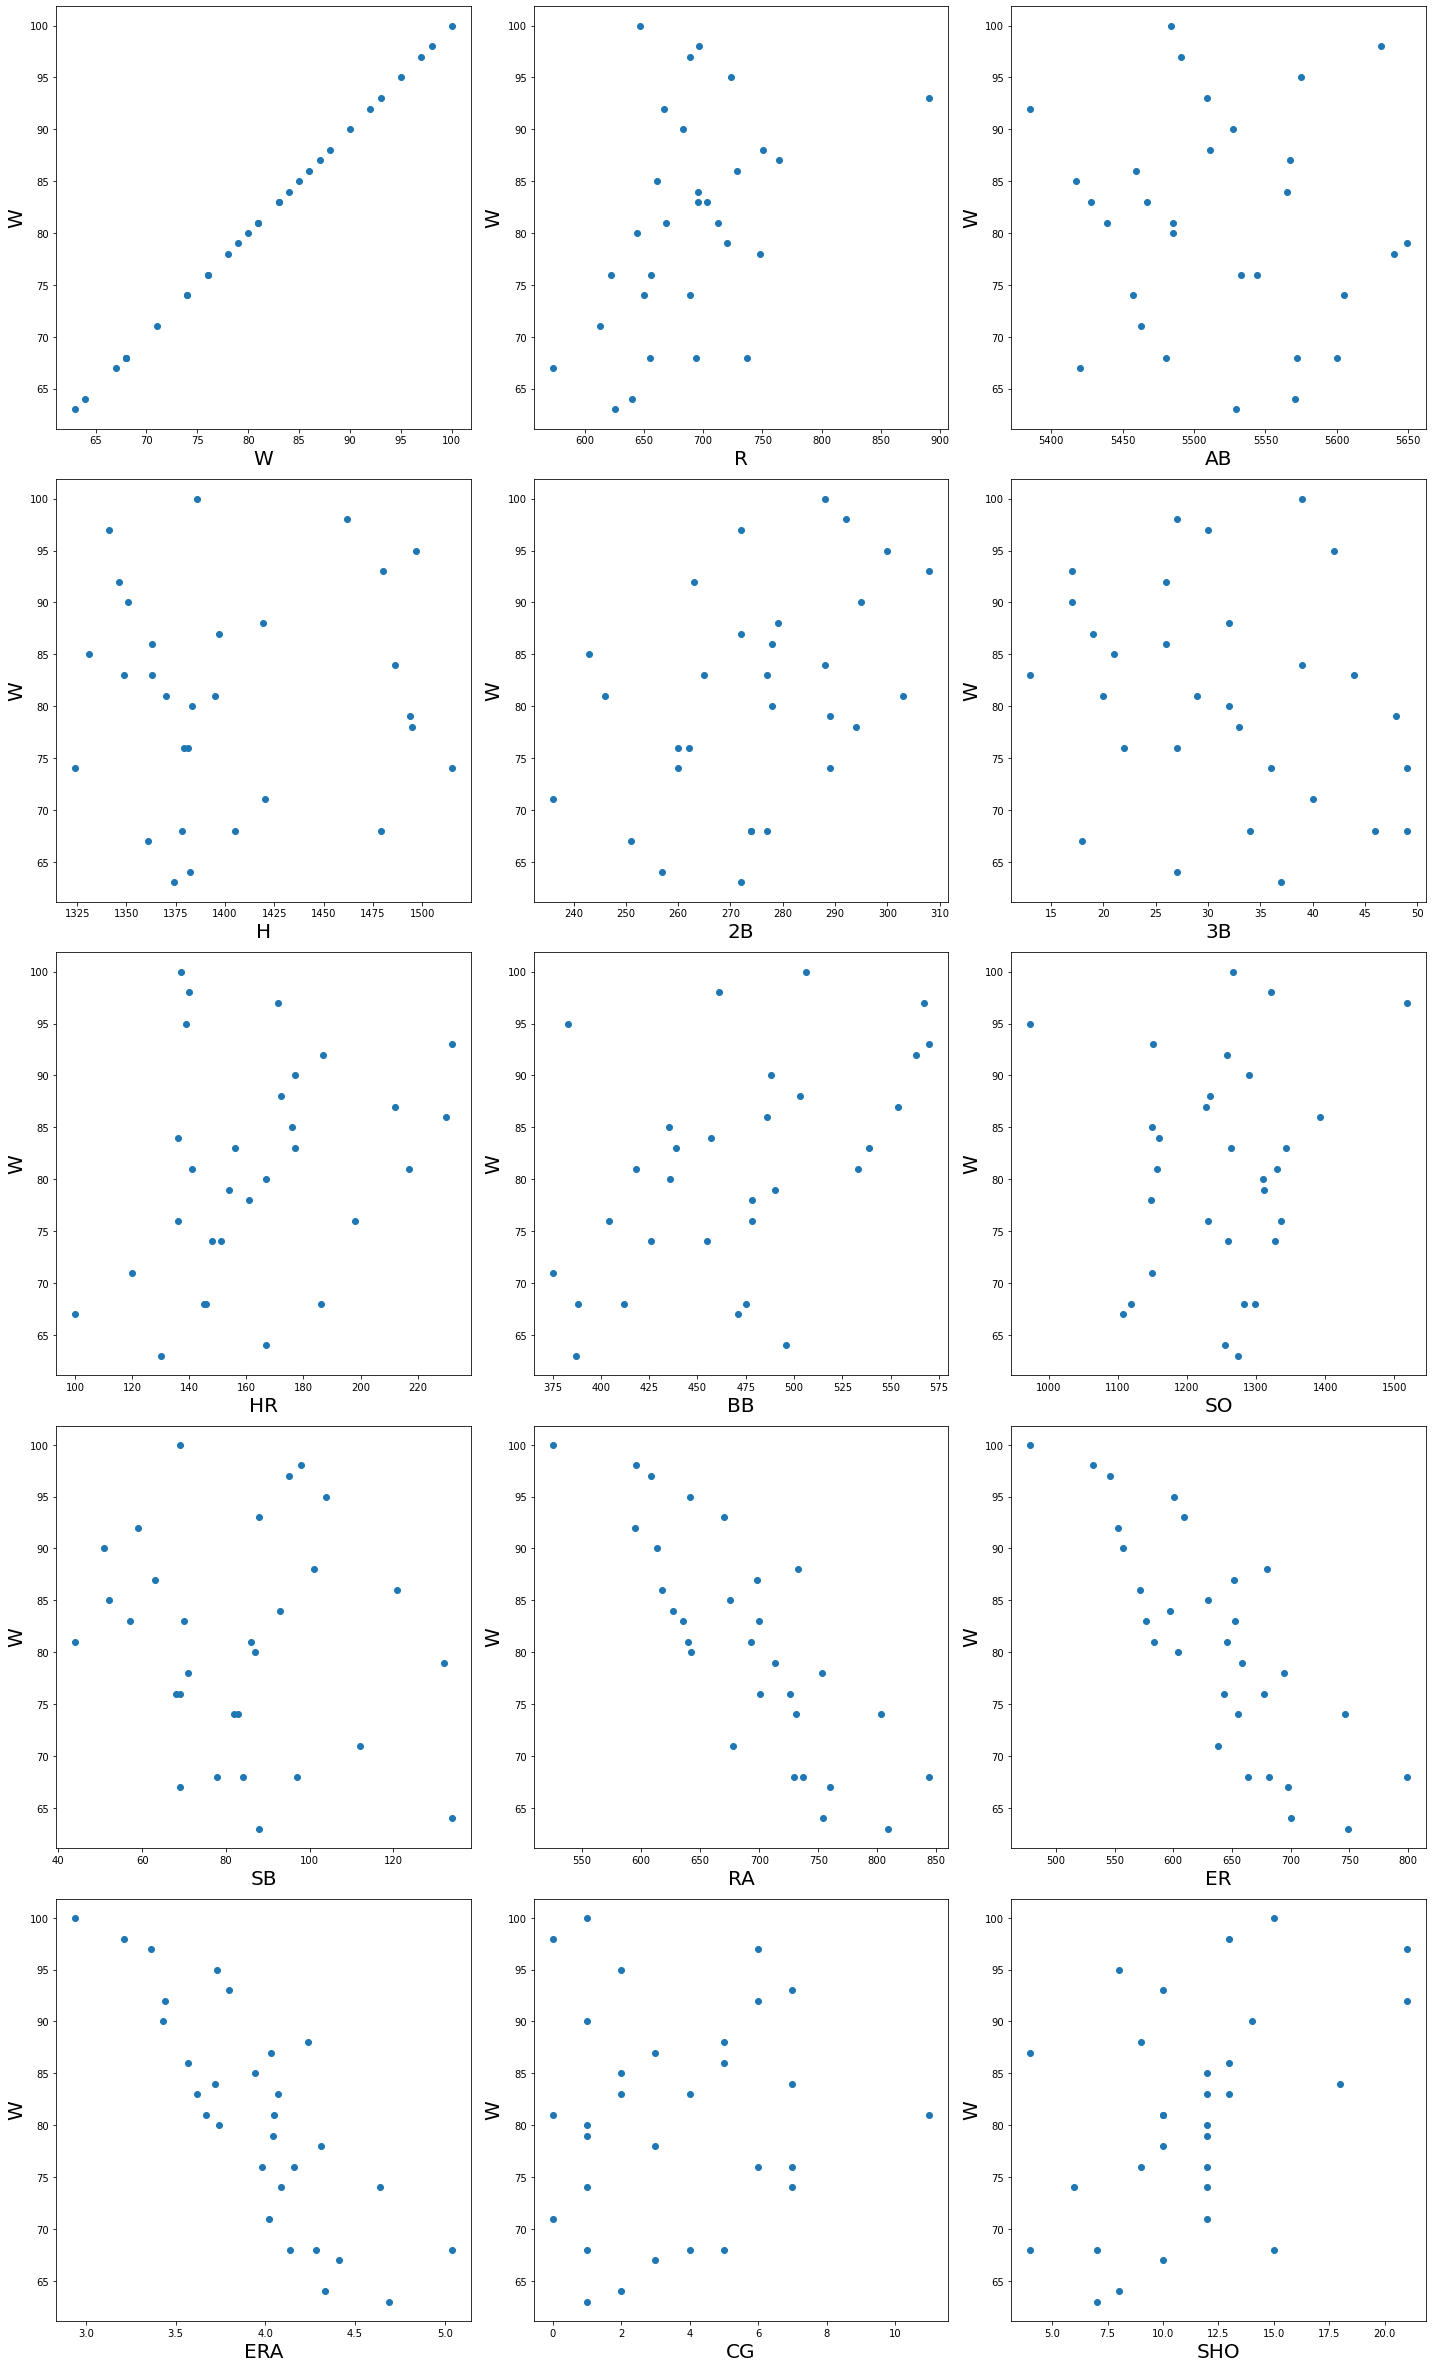

In [259]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=15: #double the features
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df[column],df['W'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W', fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [260]:
#The relation of RA, ER & ERA are all negative with the target column with a similar weightage.
#Hence,as per our observation, we will drop ER & ERA both to solve the problem of multicollinearity in the model.

# DROPPING THE COLUMNS

In [261]:
df = df.drop(columns=['ERA','ER'])

# DIVIDE INTO FEATURE & LABEL

In [262]:
X=df.drop(columns=['W'])
y=df['W']

In [263]:
#VIF 
vif=pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif["features"]=X.columns
vif.sort_values(by=['VIF'], ascending=False)

,VIF,features
2,3981.120045,H
1,3852.483163,AB
0,1379.079961,R
3,832.389656,2B
9,478.234439,RA
7,326.550466,SO
6,244.702756,BB
5,192.557207,HR
12,92.432750,SV
13,79.744614,E


In [264]:
#FEATURE SELECTION

#Using SelectKBest feature seleciton Method
from sklearn.feature_selection import SelectKBest,f_classif
best_features=SelectKBest(f_classif, k=14)
fit=best_features.fit(X,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(X.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns,df_scores],axis=1)
#name output columns
feature_scores.columns = ['Feaure_Name','Score']
#print 17 best features
print(feature_scores.nlargest(14,'Score'))

   Feaure_Name     Score
0            R  4.325471
8           SB  3.145176
12          SV  2.966365
9           RA  2.420967
13           E  2.403946
1           AB  1.552727
7           SO  1.509218
11         SHO  1.204067
6           BB  1.048384
5           HR  0.989166
3           2B  0.904863
4           3B  0.850035
2            H  0.763151
10          CG  0.383449


In [265]:
#Since CG has the lowest score in SelectKBest, we will drop CG

In [266]:
X=X.drop(columns=['CG'])

# DATA VISUALIZATION

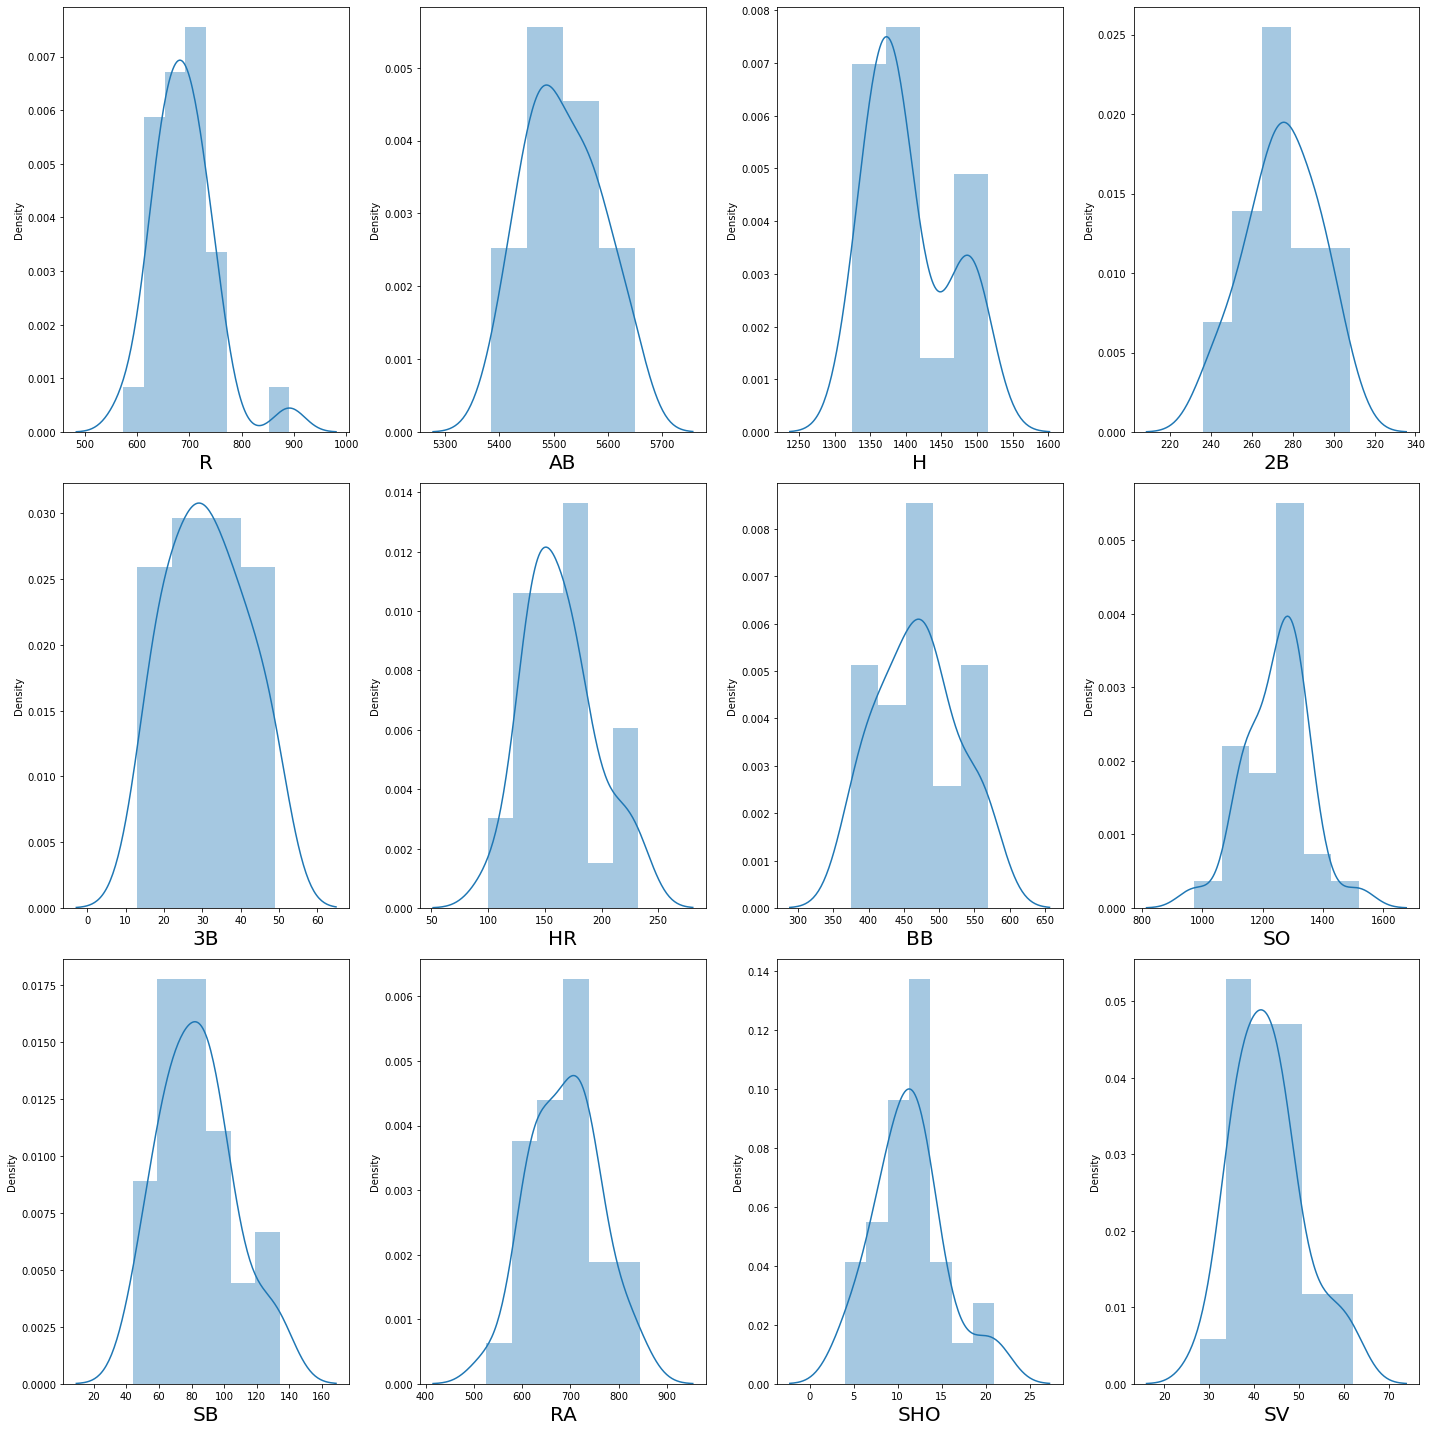

In [267]:
#VISUALISE THE DATA AND ANALYSE THE RELATIONSHIP BETWEEN INDPENDENT & DEPENDENT VARIABLES (DISTRIBUTION PLOT)

plt.figure(figsize = (20,20), facecolor = 'white')
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(X[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

# REMOVING SKEWNESS & OUTLIERS FROM THE DATASET¶

In [268]:
X.skew().sort_values(ascending=False)

R      1.200786
E      0.890132
H      0.670254
SV     0.657524
SHO    0.565790
HR     0.516441
SB     0.479893
AB     0.183437
BB     0.158498
3B     0.129502
RA     0.045734
SO    -0.156065
2B    -0.230650
dtype: float64

In [269]:
#We can see skewness in few of our columns, we will remove the skewness using power_transform function
from sklearn.preprocessing import power_transform
X_new = np.log(X)
X=pd.DataFrame(X_new,columns=X.columns)
X.skew().sort_values(ascending=False) #validating that the skewness is removed

R      0.744196
E      0.630080
H      0.628554
AB     0.161058
SV     0.150582
HR    -0.013351
BB    -0.051741
SB    -0.168916
RA    -0.242397
2B    -0.375624
3B    -0.441291
SO    -0.540955
SHO   -0.721953
dtype: float64

In [270]:
#Post Log-transformation, the skewness in E & R has been reduced.

In [271]:
#Data Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

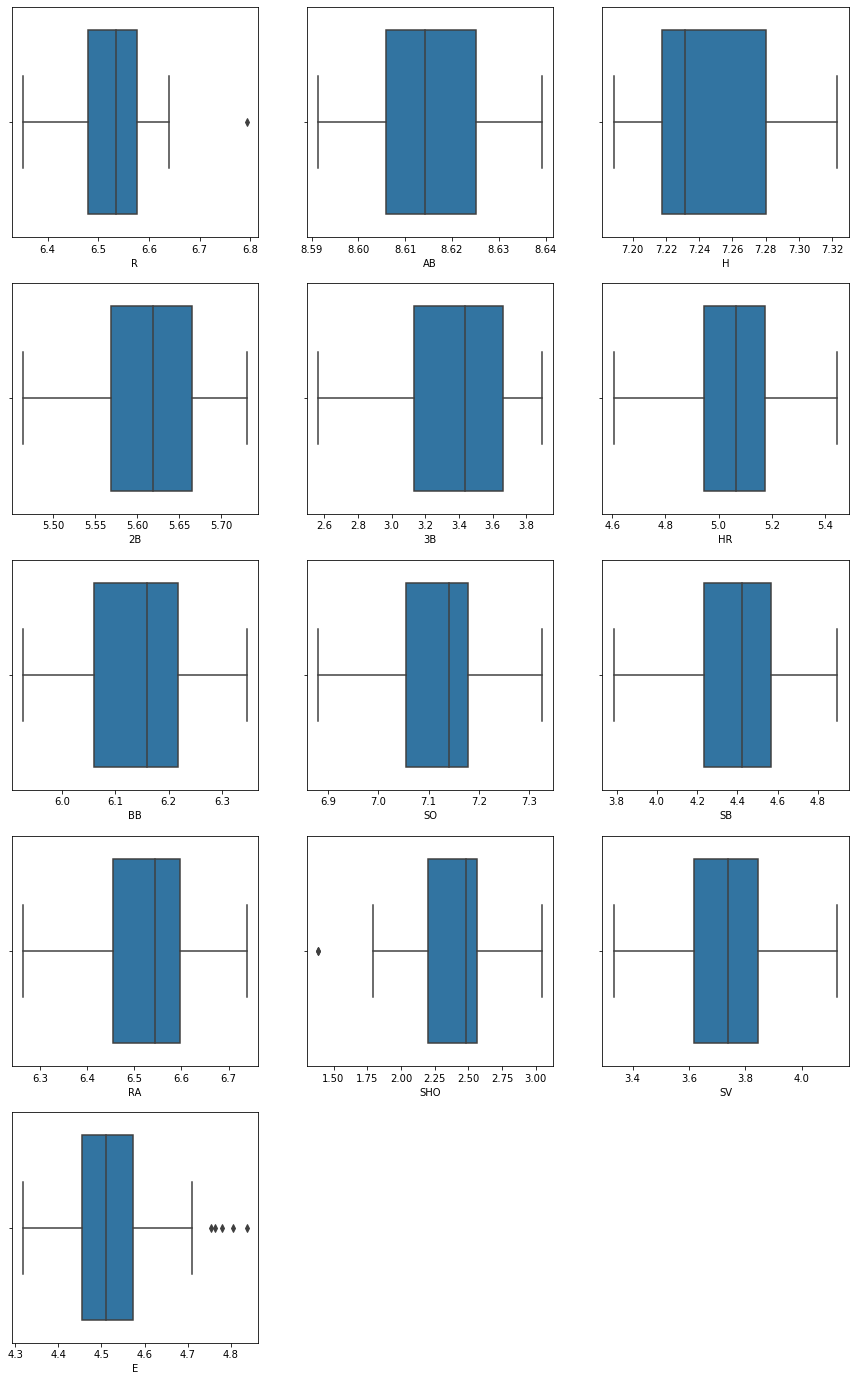

In [272]:
#Visualizing the outliers using BOXPLOT

plt.figure(figsize=(15,50))
graph=1

for column in X:
	if graph<=30: #3 times the column nos
		ax=plt.subplot(10,3,graph)
		sns.boxplot(X[column],orient='v')
		plt.xlabel(column,fontsize=10)
	graph+=1
plt.show()

In [273]:
#Apart from E, there are negligible outliers in the features.
#R & SHO has a few outliers.

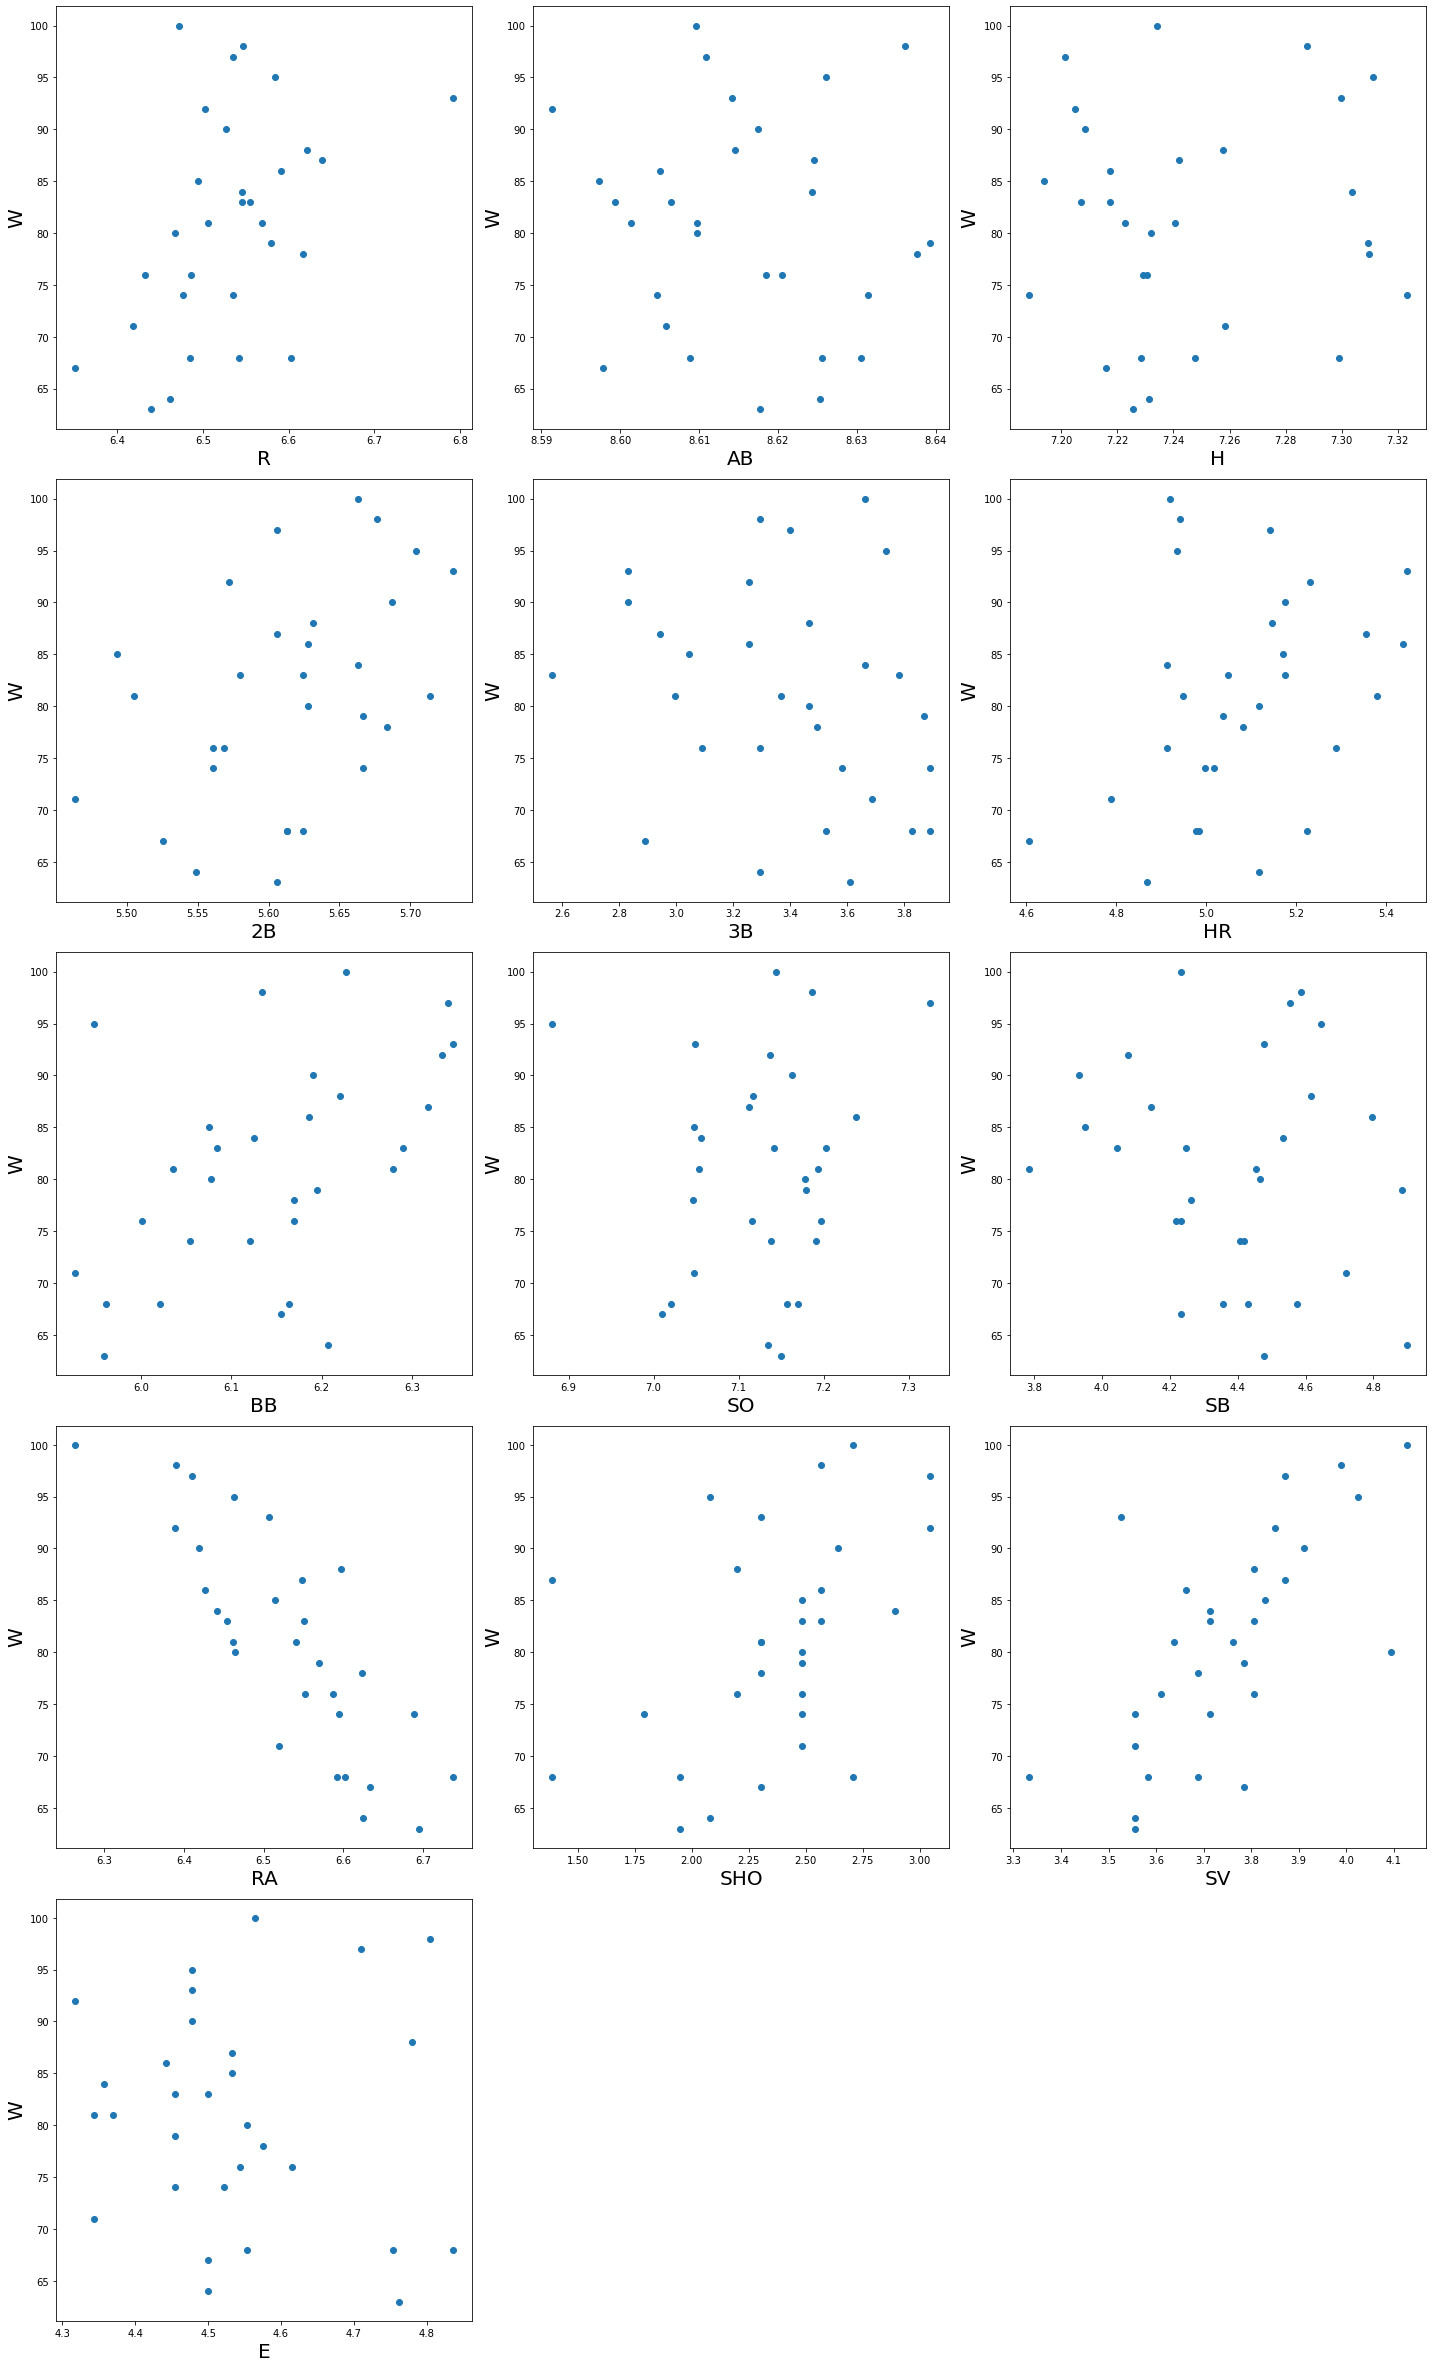

In [274]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=15: #double the features
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W', fontsize=20)
    plotnumber+=1
plt.tight_layout()

# APPLYING REGRESSION MODELS & FINDING BEST FIT MODEL¶¶

In [275]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
for i in range(0,100):
	x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=i)
	lr.fit(x_train,y_train)
	y_pred_train=lr.predict(x_train)
	y_pred=lr.predict(x_test)
	print(f"At random state {i},the training accuracy is:- {r2_score(y_train,y_pred_train)}")
	print(f"At random state {i},the testing accuracy is:- {r2_score(y_test,y_pred)}")
	print("\n")

At random state 0,the training accuracy is:- 0.9429977751046528
At random state 0,the testing accuracy is:- 0.623452301775959


At random state 1,the training accuracy is:- 0.9438883348529795
At random state 1,the testing accuracy is:- 0.7632989263473784


At random state 2,the training accuracy is:- 0.966920757144441
At random state 2,the testing accuracy is:- 0.11251256194393


At random state 3,the training accuracy is:- 0.9534425958840185
At random state 3,the testing accuracy is:- 0.4951585340072364


At random state 4,the training accuracy is:- 0.9038437448246639
At random state 4,the testing accuracy is:- 0.8790485588907551


At random state 5,the training accuracy is:- 0.9253920261440194
At random state 5,the testing accuracy is:- 0.8583109422212533


At random state 6,the training accuracy is:- 0.9162354102387295
At random state 6,the testing accuracy is:- 0.7526058573071058


At random state 7,the training accuracy is:- 0.9305715313273676
At random state 7,the testing accurac

At random state 86,the training accuracy is:- 0.9177187279465103
At random state 86,the testing accuracy is:- 0.8141718616031183


At random state 87,the training accuracy is:- 0.9582445580820136
At random state 87,the testing accuracy is:- 0.4407827391281455


At random state 88,the training accuracy is:- 0.9840488143256133
At random state 88,the testing accuracy is:- -0.05018734020076132


At random state 89,the training accuracy is:- 0.929983816273285
At random state 89,the testing accuracy is:- 0.5263921576788995


At random state 90,the training accuracy is:- 0.9222874245367322
At random state 90,the testing accuracy is:- 0.7598705079282639


At random state 91,the training accuracy is:- 0.9465902582275759
At random state 91,the testing accuracy is:- 0.37062377457009776


At random state 92,the training accuracy is:- 0.9566823817165782
At random state 92,the testing accuracy is:- 0.6277547992030292


At random state 93,the training accuracy is:- 0.9433906018211584
At random state 

In [276]:
#LINEAR REGRESSION
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.30,random_state=99)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred)*100)

87.99183757000615


In [277]:
#Lasso Regularization
lasscv=LassoCV(alphas=None, max_iter=1000, normalize=True)
lasscv.fit(x_train,y_train)
alpha=lasscv.alpha_
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lasso_reg.score(x_test,y_test)

0.8998416156592323

In [278]:
#Ridge Regularization
ridgecv=RidgeCV(normalize=True)
ridgecv.fit(x_train,y_train)
ridgecv.alpha_
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)
ridge_model.score(x_test,y_test)

0.8853194267538181

In [279]:
#DECISION TREE REGRESSOR
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
y_pred_dt=dt.predict(x_test)
print("Score", r2_score(y_test,y_pred_dt)*100)

Score 1.3136288998357948


In [280]:
#RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
print("Score", r2_score(y_test,y_pred_rf)*100)

Score 47.67825944170774


In [281]:
#SVR
from sklearn.svm import SVR
svr = SVR(C=1.0, epsilon=0.2)
svr.fit(x_train,y_train)
y_pred_svr = svr.predict(x_test)
print("Score", r2_score(y_test,y_pred_svr)*100)

Score 4.5370739990090225


In [282]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
ada = AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)
accuracy = r2_score(y_train,y_pred)
print('Training R square score', accuracy)

y_test_pred = ada.predict(x_test)
accuracy = r2_score(y_test,y_test_pred)
print('Testing R square score', accuracy)

Training R square score 0.9924761756655884
Testing R square score 0.4715284049443532


In [283]:
#CROSS VALIDATION
from sklearn.model_selection import cross_val_score
scr = cross_val_score(lr,X,y,cv=5)
print("Cross validation score of Linear Regression Model", scr.mean())
scr2 = cross_val_score(rf,X,y,cv=5)
print("Cross validation score of Random Forest Model", scr2.mean())
#scr3 = cross_val_score(LR,X,y,cv=5)
#print("Cross validation score of Logistic Regression Model", scr3.mean())
scr4 = cross_val_score(dt,X,y,cv=5)
print("Cross validation score of Decision Tree Model", scr4.mean())
scr5 = cross_val_score(svr,X,y,cv=5)
print("Cross validation score of SVR Model", scr5.mean())
scr = cross_val_score(ada,X,y,cv=5)
print("Cross validation score of Ada Boost Model", scr.mean())

Cross validation score of Linear Regression Model 0.27366862677383463
Cross validation score of Random Forest Model -0.7625879031458815
Cross validation score of Decision Tree Model -2.331277663133136
Cross validation score of SVR Model -0.4537446953456346
Cross validation score of Ada Boost Model -0.7509020620061989


In [284]:
#REGULARIZATION
from sklearn.model_selection import GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Lasso
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10], 'random_state': list(range(0,10))}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)


{'alpha': 1, 'random_state': 0}


In [285]:
ls=Lasso(alpha=1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
lss=r2_score(y_test,pred_ls)
lss
cv_score=cross_val_score(ls,X,y,cv=5)
cv_mean=cv_score.mean()
cv_mean*100

-77.47516331493102

# Since Lasso regression model has the best score, we will finalise the model.

# SAVE THE MODEL

In [ ]:
#SAVING THE MODEL IN PICKLE FORMAT
#PICKELING OF A FILE OR SERIALIZATION OF A FILE
import joblib
joblib.dump(Gclf.best_params_,"BaseBall.pkl")